Xtreme Weather Forecasting

The task is to predict the arithmetic mean of the maximum and minimum temperature over the next 14 days, for each location and start date.

Dataset : https://www.kaggle.com/competitions/widsdatathon2023/data



This is part II of EDA. Here I am going to split the dataset on the basis of climatic regions.

In [1]:
# mounting GDrive to connect csv file
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
# import libraries
import numpy as np
import pandas as pd  
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.impute import SimpleImputer
import missingno as msno  
#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
#import train dataset
#train_df = pd.read_csv('/content/gdrive/My Drive/Omdena project/train_data.csv')
train_df = pd.read_csv('train_data.csv')

# Reducing the size of Dataset #

Before splitting the dataset , I  will be dropping few columns 
1. Index - no specific use of that column
2. Columns with features of zonal, meridional and surface wind components with a prefix of 2010 w.r.t to elnino features - This was discussed in the meetings and channel by the experts and was concluded that they maynot be contributing much in analysis .
3. Columns with weeks 5-6 weighted average of monthly NMME model  and most recent monthly NMME model forecasts(nmme0-prate-56w ,nmme-tmp2m-56w ,nmme-prate-56w)  - Highly correlated to forecasts of 3-4 weeks model (correlation map in my EDA part I )

In [4]:
train_df.shape

(375734, 246)

In [5]:
train_df = train_df.drop('index', axis=1)  #dropping the index column....

In [6]:
train_df = train_df.drop('wind-vwnd-925-2010-1', axis=1)   #dropping the columnns with long range longitudnal wind-925 forecast ( prefix with 2010-1....)....
train_df = train_df.drop('wind-vwnd-925-2010-2', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-3', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-4', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-5', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-6', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-7', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-8', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-9', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-10', axis=1)  
train_df = train_df.drop('wind-vwnd-925-2010-11', axis=1)  
train_df = train_df.drop('wind-vwnd-925-2010-12', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-13', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-14', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-15', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-16', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-17', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-18', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-19', axis=1) 
train_df = train_df.drop('wind-vwnd-925-2010-20', axis=1)  

In [7]:
train_df.head()

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-hgt-100-2010-1,wind-hgt-100-2010-2,wind-hgt-100-2010-3,wind-hgt-100-2010-4,wind-hgt-100-2010-5,wind-hgt-100-2010-6,wind-hgt-100-2010-7,wind-hgt-100-2010-8,wind-hgt-100-2010-9,wind-hgt-100-2010-10
0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,31.52,...,-25749.70,-5160.59,-1507.91,3391.32,-288.52,-1585.41,1544.02,944.73,-1267.75,-2402.46
1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,31.52,...,-25474.37,-5356.70,-1367.76,3188.99,-221.06,-1193.63,1256.48,2018.62,-1110.56,-2413.81
2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,31.52,...,-25200.29,-5546.88,-1230.46,2996.82,-111.60,-796.13,936.58,2959.85,-995.13,-2302.45
3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,31.52,...,-24789.70,-5692.21,-1177.18,2799.89,-38.07,-362.72,608.32,3796.72,-966.93,-2125.09
4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,31.52,...,-24181.96,-5754.12,-1208.87,2582.56,-35.19,80.43,355.94,4507.20,-1028.33,-1885.90


In [8]:
train_df.shape

(375734, 225)

In [9]:
train_df = train_df.drop('wind-hgt-100-2010-1', axis=1) # dropping the columns of wind height-100 with a prefix of 2010-1 to 2010 -10
train_df = train_df.drop('wind-hgt-100-2010-2', axis=1) 
train_df = train_df.drop('wind-hgt-100-2010-3', axis=1) 
train_df = train_df.drop('wind-hgt-100-2010-4', axis=1) 
train_df = train_df.drop('wind-hgt-100-2010-5', axis=1) 
train_df = train_df.drop('wind-hgt-100-2010-6', axis=1) 
train_df = train_df.drop('wind-hgt-100-2010-7', axis=1) 
train_df = train_df.drop('wind-hgt-100-2010-8', axis=1) 
train_df = train_df.drop('wind-hgt-100-2010-9', axis=1) 
train_df = train_df.drop('wind-hgt-100-2010-10', axis=1)  

In [10]:
train_df = train_df.drop('wind-hgt-10-2010-1', axis=1) # dropping the columns of wind height-10 with a prefix of 2010-1 to 2010-10
train_df = train_df.drop('wind-hgt-10-2010-2', axis=1) 
train_df = train_df.drop('wind-hgt-10-2010-3', axis=1) 
train_df = train_df.drop('wind-hgt-10-2010-4', axis=1) 
train_df = train_df.drop('wind-hgt-10-2010-5', axis=1) 
train_df = train_df.drop('wind-hgt-10-2010-6', axis=1) 
train_df = train_df.drop('wind-hgt-10-2010-7', axis=1) 
train_df = train_df.drop('wind-hgt-10-2010-8', axis=1) 
train_df = train_df.drop('wind-hgt-10-2010-9', axis=1) 
train_df = train_df.drop('wind-hgt-10-2010-10', axis=1)  

In [11]:
train_df.shape

(375734, 205)

In [12]:
train_df = train_df.drop('wind-uwnd-925-2010-1', axis=1) # dropping the columns of zonalwind at 925 millibars with a prefix of 2010-1 to 2010-20
train_df = train_df.drop('wind-uwnd-925-2010-2', axis=1)
train_df = train_df.drop('wind-uwnd-925-2010-3', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-4', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-5', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-6', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-7', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-8', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-9', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-10', axis=1)
train_df = train_df.drop('wind-uwnd-925-2010-11', axis=1)  
train_df = train_df.drop('wind-uwnd-925-2010-12', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-13', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-14', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-15', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-16', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-17', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-18', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-19', axis=1) 
train_df = train_df.drop('wind-uwnd-925-2010-20', axis=1) 

In [13]:
train_df.shape

(375734, 185)

In [14]:
train_df = train_df.drop('icec-2010-1', axis=1) # dropping the columns of ice concentration prefix of 2010-1 to 2010 -10
train_df = train_df.drop('icec-2010-2', axis=1) 
train_df = train_df.drop('icec-2010-3', axis=1) 
train_df = train_df.drop('icec-2010-4', axis=1) 
train_df = train_df.drop('icec-2010-5', axis=1) 
train_df = train_df.drop('icec-2010-6', axis=1) 
train_df = train_df.drop('icec-2010-7', axis=1) 
train_df = train_df.drop('icec-2010-8', axis=1) 
train_df = train_df.drop('icec-2010-9', axis=1) 
train_df = train_df.drop('icec-2010-10', axis=1) 

In [15]:
train_df.shape

(375734, 175)

In [16]:
train_df = train_df.drop('wind-hgt-500-2010-1', axis=1) # dropping the columns of wind height-500 with a prefix of 2010-1 to 2010-10
train_df = train_df.drop('wind-hgt-500-2010-2', axis=1) 
train_df = train_df.drop('wind-hgt-500-2010-3', axis=1) 
train_df = train_df.drop('wind-hgt-500-2010-4', axis=1) 
train_df = train_df.drop('wind-hgt-500-2010-5', axis=1) 
train_df = train_df.drop('wind-hgt-500-2010-6', axis=1) 
train_df = train_df.drop('wind-hgt-500-2010-7', axis=1) 
train_df = train_df.drop('wind-hgt-500-2010-8', axis=1) 
train_df = train_df.drop('wind-hgt-500-2010-9', axis=1) 
train_df = train_df.drop('wind-hgt-500-2010-10', axis=1) 

In [17]:
train_df.shape

(375734, 165)

In [18]:
train_df = train_df.drop('sst-2010-1', axis=1) # dropping the columns of seasurface temperature with a prefix of 2010-1 to 2010-10
train_df = train_df.drop('sst-2010-2', axis=1) 
train_df = train_df.drop('sst-2010-3', axis=1) 
train_df = train_df.drop('sst-2010-4', axis=1) 
train_df = train_df.drop('sst-2010-5', axis=1) 
train_df = train_df.drop('sst-2010-6', axis=1) 
train_df = train_df.drop('sst-2010-7', axis=1) 
train_df = train_df.drop('sst-2010-8', axis=1) 
train_df = train_df.drop('sst-2010-9', axis=1) 
train_df = train_df.drop('sst-2010-10', axis=1) 

In [19]:
train_df.shape

(375734, 155)

In [20]:
train_df = train_df.drop('wind-hgt-850-2010-1', axis=1)
train_df = train_df.drop('wind-hgt-850-2010-2', axis=1) # dropping the columns of wind height-850 with a prefix of 2010-1 to 2010-10
train_df = train_df.drop('wind-hgt-850-2010-3', axis=1) 
train_df = train_df.drop('wind-hgt-850-2010-4', axis=1) 
train_df = train_df.drop('wind-hgt-850-2010-5', axis=1) 
train_df = train_df.drop('wind-hgt-850-2010-6', axis=1) 
train_df = train_df.drop('wind-hgt-850-2010-7', axis=1) 
train_df = train_df.drop('wind-hgt-850-2010-8', axis=1) 
train_df = train_df.drop('wind-hgt-850-2010-9', axis=1) 
train_df = train_df.drop('wind-hgt-850-2010-10', axis=1) 

In [21]:
train_df.shape

(375734, 145)

In [22]:
train_df = train_df.drop('wind-uwnd-250-2010-1', axis=1)   #dropping the columnns with long range forecast  of zonal wind at 250 millibars( prefix with 2010-1....)....
train_df = train_df.drop('wind-uwnd-250-2010-2', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-3', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-4', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-5', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-6', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-7', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-8', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-9', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-10', axis=1)  
train_df = train_df.drop('wind-uwnd-250-2010-11', axis=1)  
train_df = train_df.drop('wind-uwnd-250-2010-12', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-13', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-14', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-15', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-16', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-17', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-18', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-19', axis=1) 
train_df = train_df.drop('wind-uwnd-250-2010-20', axis=1)  

In [23]:
train_df.shape

(375734, 125)

In [24]:
train_df = train_df.drop('wind-vwnd-250-2010-1', axis=1)   #dropping the columnns with long range forecast  of zonal wind at 250 millibars( prefix with 2010-1....)....
train_df = train_df.drop('wind-vwnd-250-2010-2', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-3', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-4', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-5', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-6', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-7', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-8', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-9', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-10', axis=1)  
train_df = train_df.drop('wind-vwnd-250-2010-11', axis=1)  
train_df = train_df.drop('wind-vwnd-250-2010-12', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-13', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-14', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-15', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-16', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-17', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-18', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-19', axis=1) 
train_df = train_df.drop('wind-vwnd-250-2010-20', axis=1)  

In [25]:
train_df.shape

(375734, 105)

In [26]:
train_df = train_df.drop('nmme-tmp2m-56w__cancm3', axis=1) # dropping columns of weeks 5-6 weighted average of monthly NMME model forecasts for target label
train_df = train_df.drop('nmme-tmp2m-56w__cancm4', axis=1)
train_df = train_df.drop('nmme-tmp2m-56w__ccsm3', axis=1)
train_df = train_df.drop('nmme-tmp2m-56w__ccsm4', axis=1)
train_df = train_df.drop('nmme-tmp2m-56w__cfsv2', axis=1)
train_df = train_df.drop('nmme-tmp2m-56w__gfdl', axis=1)
train_df = train_df.drop('nmme-tmp2m-56w__gfdlflora', axis=1)
train_df = train_df.drop('nmme-tmp2m-56w__gfdlflorb', axis=1)
train_df = train_df.drop('nmme-tmp2m-56w__nasa', axis=1)
train_df = train_df.drop('nmme-tmp2m-56w__nmmemean', axis=1)

In [27]:
train_df.shape

(375734, 95)

In [28]:
train_df = train_df.drop('nmme-prate-56w__cancm3', axis=1) # dropping columns of weeks 5-6 weighted average of monthly NMME model forecasts for  precipitation
train_df = train_df.drop('nmme-prate-56w__cancm4', axis=1)
train_df = train_df.drop('nmme-prate-56w__ccsm3', axis=1)
train_df = train_df.drop('nmme-prate-56w__ccsm4', axis=1)
train_df = train_df.drop('nmme-prate-56w__cfsv2', axis=1)
train_df = train_df.drop('nmme-prate-56w__gfdl', axis=1)
train_df = train_df.drop('nmme-prate-56w__gfdlflora', axis=1)
train_df = train_df.drop('nmme-prate-56w__gfdlflorb', axis=1)
train_df = train_df.drop('nmme-prate-56w__nasa', axis=1)
train_df = train_df.drop('nmme-prate-56w__nmmemean', axis=1)

In [29]:
train_df.shape

(375734, 85)

In [30]:
train_df = train_df.drop('nmme0-prate-56w__cancm30', axis=1) # dropping columns of 0weeks 5-6 weighted average of most recent monthly NMME model forecasts for precipitation
train_df = train_df.drop('nmme0-prate-56w__cancm40', axis=1)
train_df = train_df.drop('nmme0-prate-56w__ccsm30', axis=1)
train_df = train_df.drop('nmme0-prate-56w__ccsm40', axis=1)
train_df = train_df.drop('nmme0-prate-56w__cfsv20', axis=1)
train_df = train_df.drop('nmme0-prate-56w__gfdl0', axis=1)
train_df = train_df.drop('nmme0-prate-56w__gfdlflora0', axis=1)
train_df = train_df.drop('nmme0-prate-56w__gfdlflorb0', axis=1)
train_df = train_df.drop('nmme0-prate-56w__nasa0', axis=1)
train_df = train_df.drop('nmme0-prate-56w__nmme0mean', axis=1)

In [31]:
train_df.shape

(375734, 75)

So far we have reduced the number of columns to 75.

##Plotting Heatmap for Environmental features ##

In [32]:
data = pd.DataFrame()    # creating a dataset of environmental factors...
data['Temperature'] = train_df['contest-tmp2m-14d__tmp2m']
data['Evaporation'] = train_df['contest-pevpr-sfc-gauss-14d__pevpr']
data['Humidity'] = train_df['contest-rhum-sig995-14d__rhum']
data['Sealevel_pressure'] = train_df['contest-slp-14d__slp']
data['Pressure'] = train_df['contest-pres-sfc-gauss-14d__pres']
data['Wind10'] = train_df['contest-wind-h10-14d__wind-hgt-10']
data['Wind100'] = train_df['contest-wind-h100-14d__wind-hgt-100']
data['Wind850'] = train_df['contest-wind-h850-14d__wind-hgt-850']
data['Wind500'] = train_df['contest-wind-h500-14d__wind-hgt-500']
data['LongitudnalWind925'] = train_df['contest-wind-vwnd-925-14d__wind-vwnd-925']
data['LongitudnalWind250'] = train_df['contest-wind-vwnd-250-14d__wind-vwnd-250']
data['ZonalWind250'] = train_df['contest-wind-uwnd-250-14d__wind-uwnd-250']
data['ZonalWind925'] = train_df['contest-wind-uwnd-925-14d__wind-uwnd-925']
data['Elevation'] = train_df['elevation__elevation']
data['Percipitation'] = train_df['contest-precip-14d__precip']
data['Percitablewater'] = train_df['contest-prwtr-eatm-14d__prwtr']


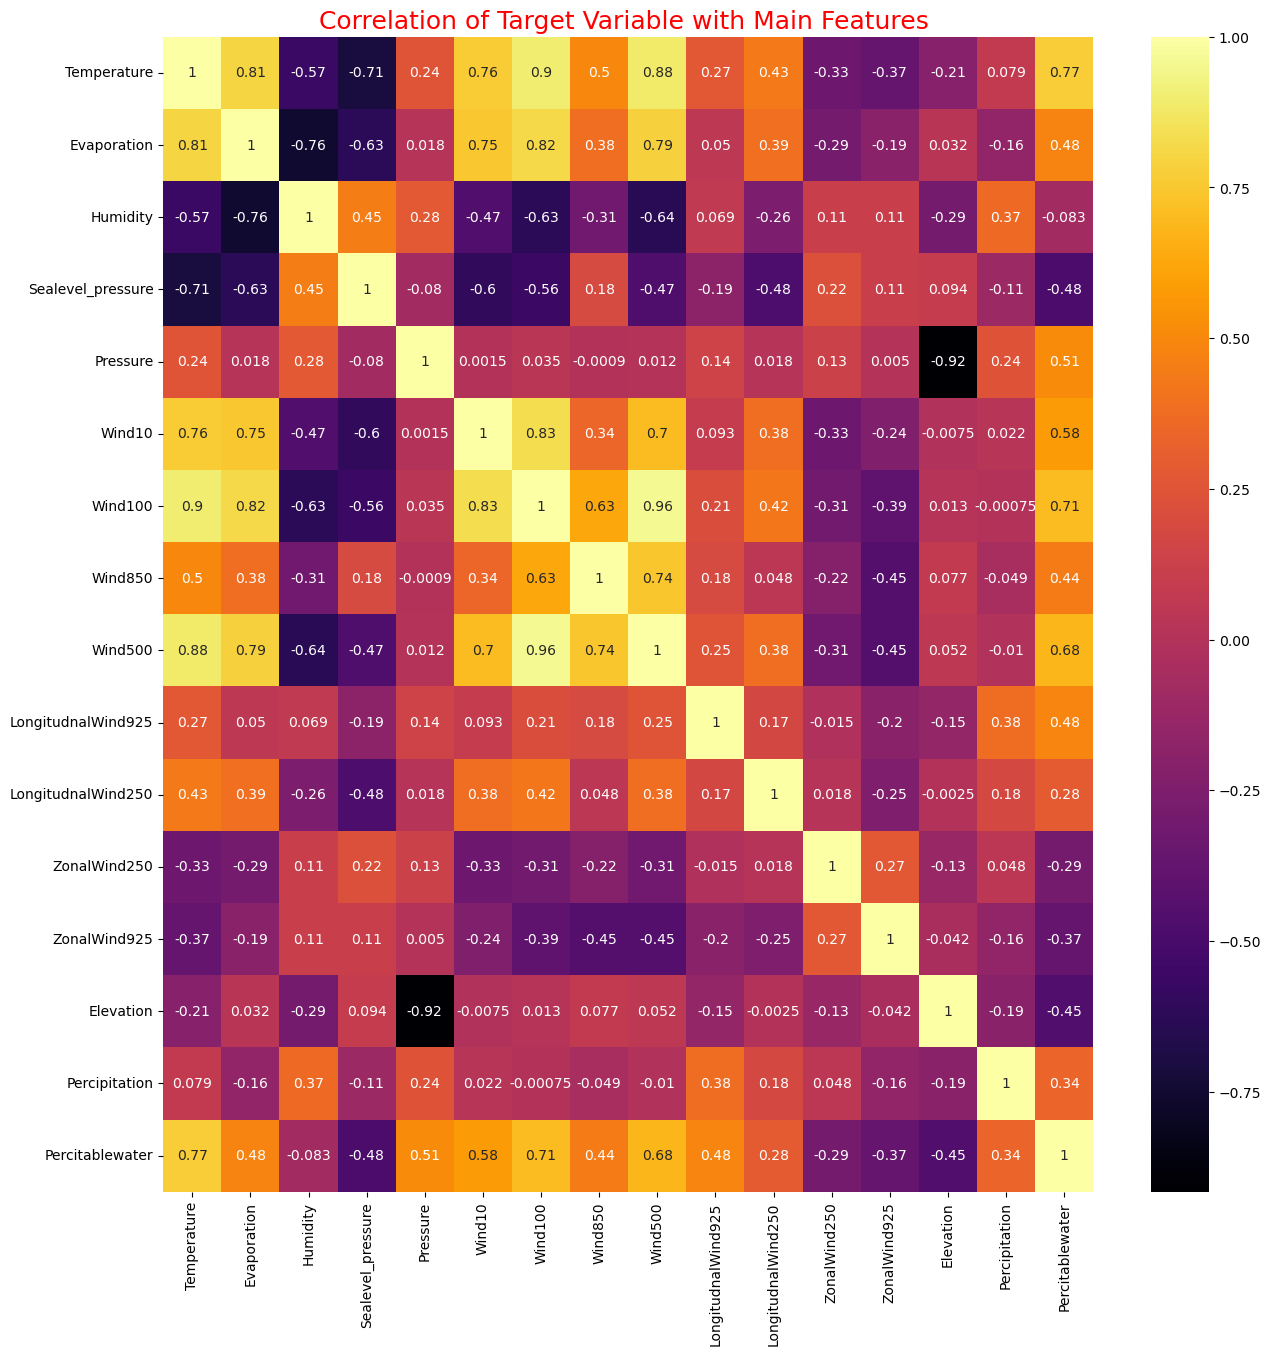

In [33]:
def Plotting():          # Plotting the Heatmap...
    plt.figure(figsize=(15,15))
    sns.heatmap(data.corr(), cmap='inferno', annot=True)
    plt.title("Correlation of Target Variable with Main Features ", size=18, c="red")
    plt.show()

Plotting()



 
 Observations found are :

1. Highly correlated features:  
                                Temperature & Evaporation (0.81)
                                Temperature & Wind 500(0.88)
                                Temperature & Wind100 (0.9)
                                Temperature & Percipitable water(0.77)
2. Negatively correlated features : 
                                    Temperature & Sealevel pressure (-0.71)
                                    Temperature & Percipitation (0.079)
                                    Temperature & Zonalwind 925 (-0.37)
                                    Temperature & Zonalwind 250 (-0.33)
                                    Elevation & Pressure(-0.92)
                                    Humidity & Evaporation(-0.76)



Also the wind at height 10 and height 100 are highly correlated, we could exclude them .Zonal Wind 925 and Zonal 250 have almost same correlation with temperature.



##Plotting Heatmap of Elnino Ratio w.r.t Target Variable ##

In [34]:
data1 = pd.DataFrame()  
data1['Temperature'] = train_df['contest-tmp2m-14d__tmp2m']
data1['MJOPhase'] = train_df['mjo1d__phase']
data1['MJOAmplitude'] = train_df['mjo1d__amplitude']
data1['MEI'] = train_df['mei__mei']
data1['MEIRank'] = train_df['mei__meirank']
data1['MEINIP'] = train_df['mei__nip']


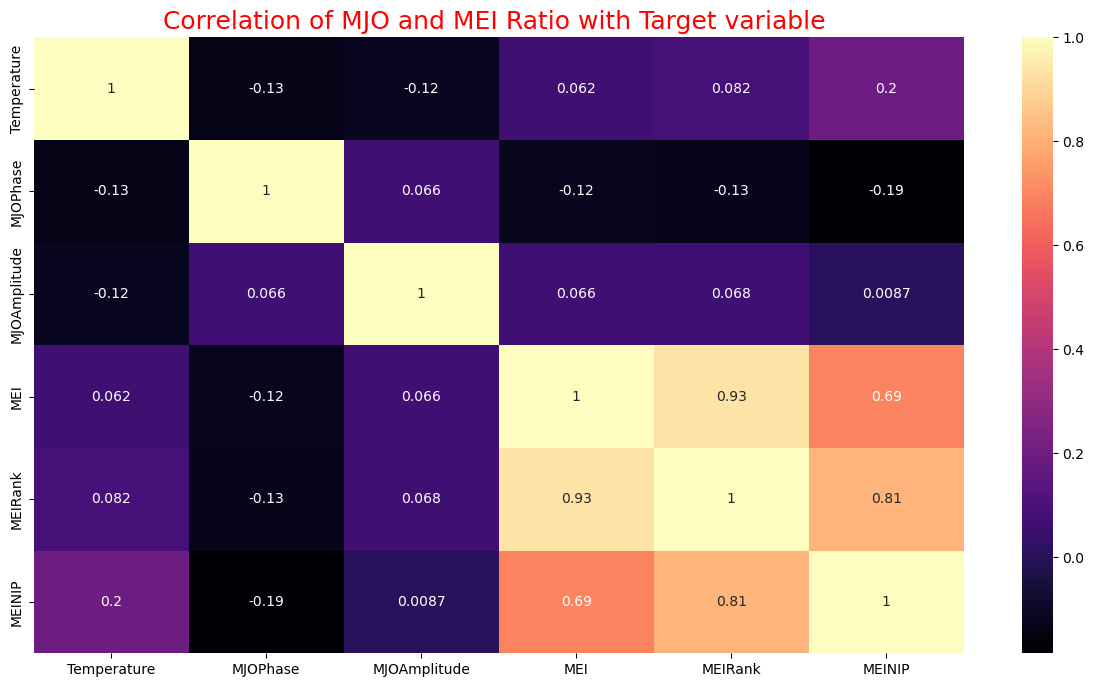

In [35]:
def Plotting():          # Plotting the Heatmap...
    plt.figure(figsize=(15,8))
    sns.heatmap(data1.corr(), cmap="magma", annot=True)
    plt.title("Correlation of MJO and MEI Ratio with Target variable ", size=18, c="red")
    plt.show()

Plotting()

Observations : 
1. High correlation between MEI,MEIRANK & MEINIP.We could drop the two columns ,MEIRank & MEINIP.
2. Negative correlation between temperature and MJOPhase & MJOAmplitude.

##Splitting dataset ##

In [36]:
train_df['locations'] = train_df['lat'].astype(str) + '; ' + train_df['lon'].astype(str)
locations = train_df[['lat', 'lon', 'climateregions__climateregion', 'locations']].drop_duplicates()
locations.groupby('climateregions__climateregion', as_index=False, sort=False).aggregate({'locations' : 'count'})

,climateregions__climateregion,locations
0,BSh,7
1,Cfa,71
2,BSk,191
3,BWk,19
4,BWh,13
5,Csa,13
6,Csb,56
7,Cfb,6
8,Dfb,72
9,Dsc,4


In [37]:
Bclimaticregions = train_df['climateregions__climateregion'][train_df['climateregions__climateregion'].str[0] == 'B']
Bclimaticregions.unique()


array(['BSh', 'BSk', 'BWk', 'BWh'], dtype=object)

In [38]:
data2 = pd.DataFrame()
Bclimaticregions_df= train_df.loc[train_df['climateregions__climateregion'].str[0] == 'B', ['contest-tmp2m-14d__tmp2m']]
Bclimaticregions_df['Temperature'] = Bclimaticregions_df.rename(columns={'contest-tmp2m-14d__tmp2m': 'Temperature'})
data2['Temperature'] = Bclimaticregions_df['Temperature']

Bclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'B', ['contest-pevpr-sfc-gauss-14d__pevpr']]
Bclimaticregions_df['Evaporation'] = Bclimaticregions_df.rename(columns={'contest-pevpr-sfc-gauss-14d__pevpr': 'Evaporation'})
data2['Evaporation'] = Bclimaticregions_df['Evaporation']

Bclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'B', ['contest-rhum-sig995-14d__rhum']]
Bclimaticregions_df['Humidity'] = Bclimaticregions_df.rename(columns={'contest-rhum-sig995-14d__rhum': 'Humidity'})
data2['Humidity'] = Bclimaticregions_df['Humidity']

Bclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'B', ['contest-slp-14d__slp']]
Bclimaticregions_df['SealevelPressure'] = Bclimaticregions_df.rename(columns={'contest-slp-14d__slp': 'SealevelPressure'})
data2['SealevelPressure'] = Bclimaticregions_df['SealevelPressure']

Bclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'B', ['contest-pres-sfc-gauss-14d__pres']]
Bclimaticregions_df['Pressure'] = Bclimaticregions_df.rename(columns={'contest-pres-sfc-gauss-14d__pres': 'Pressure'})
data2['Pressure'] = Bclimaticregions_df['Pressure']

Bclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'B', ['contest-wind-h10-14d__wind-hgt-10']]
Bclimaticregions_df['Wind'] = Bclimaticregions_df.rename(columns={'contest-wind-h10-14d__wind-hgt-10': 'Wind'})
data2['Wind'] = Bclimaticregions_df['Wind']

Bclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'B', ['elevation__elevation']]
Bclimaticregions_df['Elevation'] = Bclimaticregions_df.rename(columns={'elevation__elevation': 'Elevation'})
data2['Elevation'] = Bclimaticregions_df['Elevation']

Bclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'B', ['contest-precip-14d__precip']]
Bclimaticregions_df['Percipitation'] = Bclimaticregions_df.rename(columns={'contest-precip-14d__precip': 'Percipitation'})
data2['Percipitation'] = Bclimaticregions_df['Percipitation']

Bclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'B', ['contest-prwtr-eatm-14d__prwtr']]
Bclimaticregions_df['PercipitableWater'] = Bclimaticregions_df.rename(columns={'contest-prwtr-eatm-14d__prwtr': 'PercipitableWater'})
data2['PercipitableWater'] = Bclimaticregions_df['PercipitableWater']

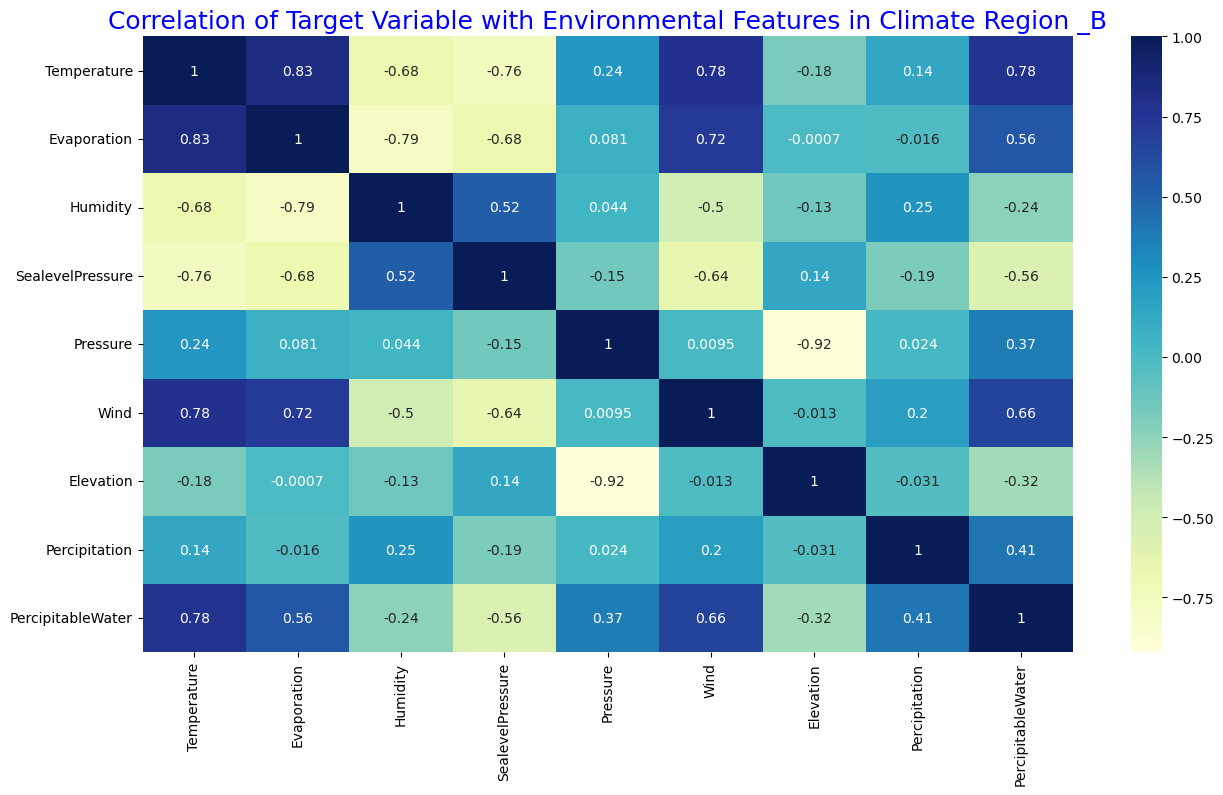

In [39]:
def Plotting2():          # Plotting the Heatmap...
    plt.figure(figsize=(15,8))
    sns.heatmap(data2.corr(), cmap='YlGnBu', annot=True)
    plt.title("Correlation of Target Variable with Environmental Features in Climate Region _B", size=18, c="blue")
    plt.show()

Plotting2()

Observations:
1. Highly correlated features:  
                                Temperature & Evaporation (0.83)
                                Temperature & Wind (0.78)
                                Temperature & Percipitable water(0.78)
2. Negatively correlated features : 
                                    Temperature & Sealevel pressure (-0.76)
                                    Percipitablewater & Sealevel pressure(-0.56)
                                    Elevation & Pressure(-0.92)
                                    Humidity & Evaporation(-0.79)
                                    Humidity & Temperature(-0.68)
                                    Humidity & Wind (-0.5)

In [40]:
Cclimaticregions = train_df['climateregions__climateregion'][train_df['climateregions__climateregion'].str[0] == 'C']
Cclimaticregions.unique()

array(['Cfa', 'Csa', 'Csb', 'Cfb'], dtype=object)

In [41]:
data3 = pd.DataFrame()
Cclimaticregions_df= train_df.loc[train_df['climateregions__climateregion'].str[0] == 'C', ['contest-tmp2m-14d__tmp2m']]
Cclimaticregions_df['Temperature'] = Cclimaticregions_df.rename(columns={'contest-tmp2m-14d__tmp2m': 'Temperature'})
data3['Temperature'] = Cclimaticregions_df['Temperature']

Cclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'C', ['contest-pevpr-sfc-gauss-14d__pevpr']]
Cclimaticregions_df['Evaporation'] = Cclimaticregions_df.rename(columns={'contest-pevpr-sfc-gauss-14d__pevpr': 'Evaporation'})
data3['Evaporation'] = Cclimaticregions_df['Evaporation']

Cclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'C', ['contest-rhum-sig995-14d__rhum']]
Cclimaticregions_df['Humidity'] = Cclimaticregions_df.rename(columns={'contest-rhum-sig995-14d__rhum': 'Humidity'})
data3['Humidity'] = Cclimaticregions_df['Humidity']

Cclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'C', ['contest-slp-14d__slp']]
Cclimaticregions_df['SealevelPressure'] = Cclimaticregions_df.rename(columns={'contest-slp-14d__slp': 'SealevelPressure'})
data3['SealevelPressure'] = Cclimaticregions_df['SealevelPressure']

Cclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'C', ['contest-pres-sfc-gauss-14d__pres']]
Cclimaticregions_df['Pressure'] = Cclimaticregions_df.rename(columns={'contest-pres-sfc-gauss-14d__pres': 'Pressure'})
data3['Pressure'] = Cclimaticregions_df['Pressure']

Cclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'C', ['contest-wind-h10-14d__wind-hgt-10']]
Cclimaticregions_df['Wind'] = Cclimaticregions_df.rename(columns={'contest-wind-h10-14d__wind-hgt-10': 'Wind'})
data3['Wind'] = Cclimaticregions_df['Wind']

Cclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'C', ['elevation__elevation']]
Cclimaticregions_df['Elevation'] = Cclimaticregions_df.rename(columns={'elevation__elevation': 'Elevation'})
data3['Elevation'] = Cclimaticregions_df['Elevation']

Cclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'C', ['contest-precip-14d__precip']]
Cclimaticregions_df['Percipitation'] = Cclimaticregions_df.rename(columns={'contest-precip-14d__precip': 'Percipitation'})
data3['Percipitation'] = Cclimaticregions_df['Percipitation']

Cclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'C', ['contest-prwtr-eatm-14d__prwtr']]
Cclimaticregions_df['PercipitableWater'] = Cclimaticregions_df.rename(columns={'contest-prwtr-eatm-14d__prwtr': 'PercipitableWater'})
data3['PercipitableWater'] = Cclimaticregions_df['PercipitableWater']

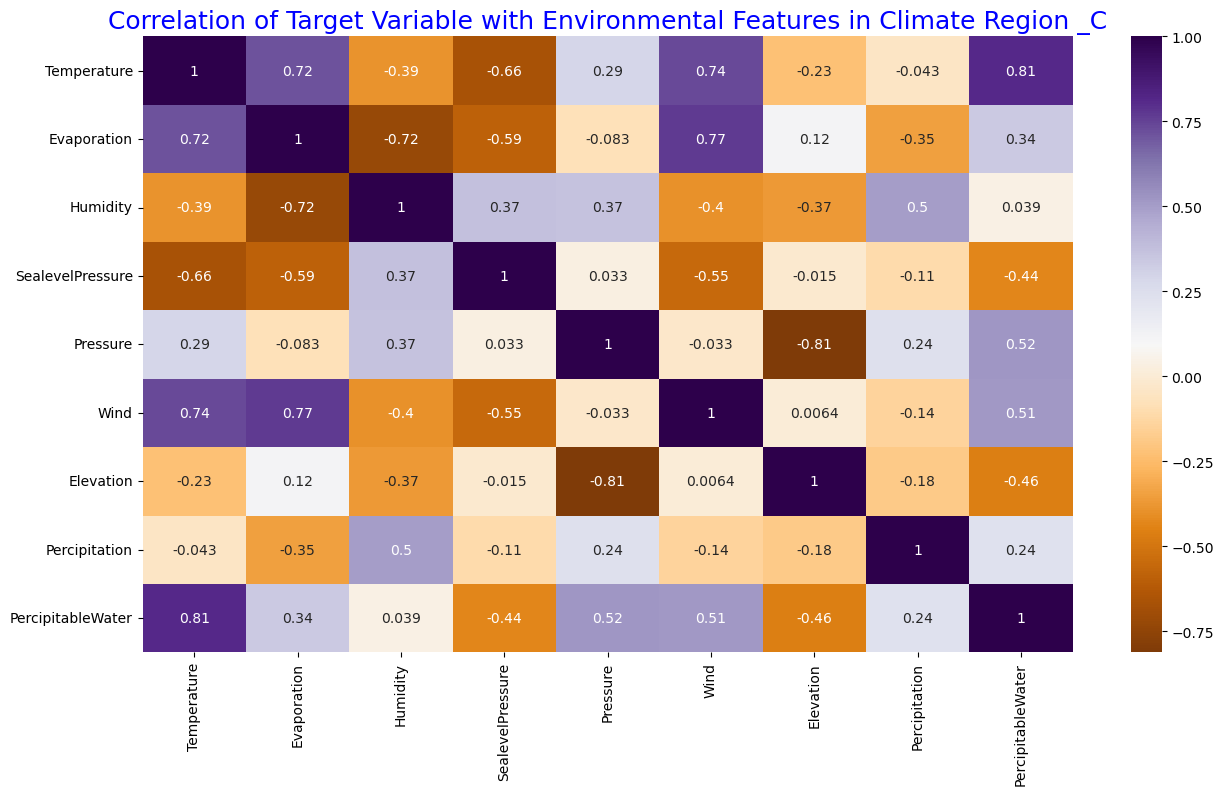

In [42]:
def Plotting3():          # Plotting the Heatmap...
    plt.figure(figsize=(15,8))
    sns.heatmap(data3.corr(),  cmap='PuOr', annot=True)
    plt.title("Correlation of Target Variable with Environmental Features in Climate Region _C", size=18, c="blue")
    plt.show()

Plotting3()

Observations:
1. Highly correlated features:  
                                Temperature & Evaporation (0.72)
                                Temperature & Wind (0.74)
                                Evaporation & Wind (0.77)
                                Temperature & Percipitable water(0.81)
2. Negatively correlated features : 
                                    Temperature & Sealevel pressure (-0.66)
                                    Percipitablewater & Sealevel pressure(-0.44)
                                    Elevation & Pressure(-0.81)
                                    Humidity & Evaporation(-0.72)
                                    Humidity & Temperature(-0.39)
                                    Humidity & Wind (-0.4)

In [43]:
Dclimaticregions = train_df['climateregions__climateregion'][train_df['climateregions__climateregion'].str[0] == 'D']
Dclimaticregions.unique()

array(['Dfb', 'Dsc', 'Dfc', 'Dfa', 'Dsb', 'Dwa', 'Dwb'], dtype=object)

In [44]:
data4 = pd.DataFrame()
Dclimaticregions_df= train_df.loc[train_df['climateregions__climateregion'].str[0] == 'D', ['contest-tmp2m-14d__tmp2m']]
Dclimaticregions_df['Temperature'] =Dclimaticregions_df.rename(columns={'contest-tmp2m-14d__tmp2m': 'Temperature'})
data4['Temperature'] = Dclimaticregions_df['Temperature']

Dclimaticregions_df= train_df.loc[train_df['climateregions__climateregion'].str[0] == 'D', ['contest-pevpr-sfc-gauss-14d__pevpr']]
Dclimaticregions_df['Evaporation'] =Dclimaticregions_df.rename(columns={'contest-pevpr-sfc-gauss-14d__pevpr': 'Evaporation'})
data4['Evaporation'] =Dclimaticregions_df['Evaporation']

Dclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'D', ['contest-rhum-sig995-14d__rhum']]
Dclimaticregions_df['Humidity'] =Dclimaticregions_df.rename(columns={'contest-rhum-sig995-14d__rhum': 'Humidity'})
data4['Humidity'] = Dclimaticregions_df['Humidity']

Dclimaticregions_df= train_df.loc[train_df['climateregions__climateregion'].str[0] == 'D', ['contest-slp-14d__slp']]
Dclimaticregions_df['SealevelPressure'] =Dclimaticregions_df.rename(columns={'contest-slp-14d__slp': 'SealevelPressure'})
data4['SealevelPressure'] = Dclimaticregions_df['SealevelPressure']

Dclimaticregions_df= train_df.loc[train_df['climateregions__climateregion'].str[0] == 'D', ['contest-pres-sfc-gauss-14d__pres']]
Dclimaticregions_df['Pressure'] =Dclimaticregions_df.rename(columns={'contest-pres-sfc-gauss-14d__pres': 'Pressure'})
data4['Pressure'] = Dclimaticregions_df['Pressure']

Dclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'D', ['contest-wind-h10-14d__wind-hgt-10']]
Dclimaticregions_df['Wind'] = Dclimaticregions_df.rename(columns={'contest-wind-h10-14d__wind-hgt-10': 'Wind'})
data4['Wind'] = Dclimaticregions_df['Wind']

Dclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'D', ['elevation__elevation']]
Dclimaticregions_df['Elevation'] = Dclimaticregions_df.rename(columns={'elevation__elevation': 'Elevation'})
data4['Elevation'] = Dclimaticregions_df['Elevation']

Dclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'D', ['contest-precip-14d__precip']]
Dclimaticregions_df['Percipitation'] = Dclimaticregions_df.rename(columns={'contest-precip-14d__precip': 'Percipitation'})
data4['Percipitation'] = Dclimaticregions_df['Percipitation']

Dclimaticregions_df = train_df.loc[train_df['climateregions__climateregion'].str[0] == 'D', ['contest-prwtr-eatm-14d__prwtr']]
Dclimaticregions_df['PercipitableWater'] = Dclimaticregions_df.rename(columns={'contest-prwtr-eatm-14d__prwtr': 'PercipitableWater'})
data4['PercipitableWater'] =Dclimaticregions_df['PercipitableWater']

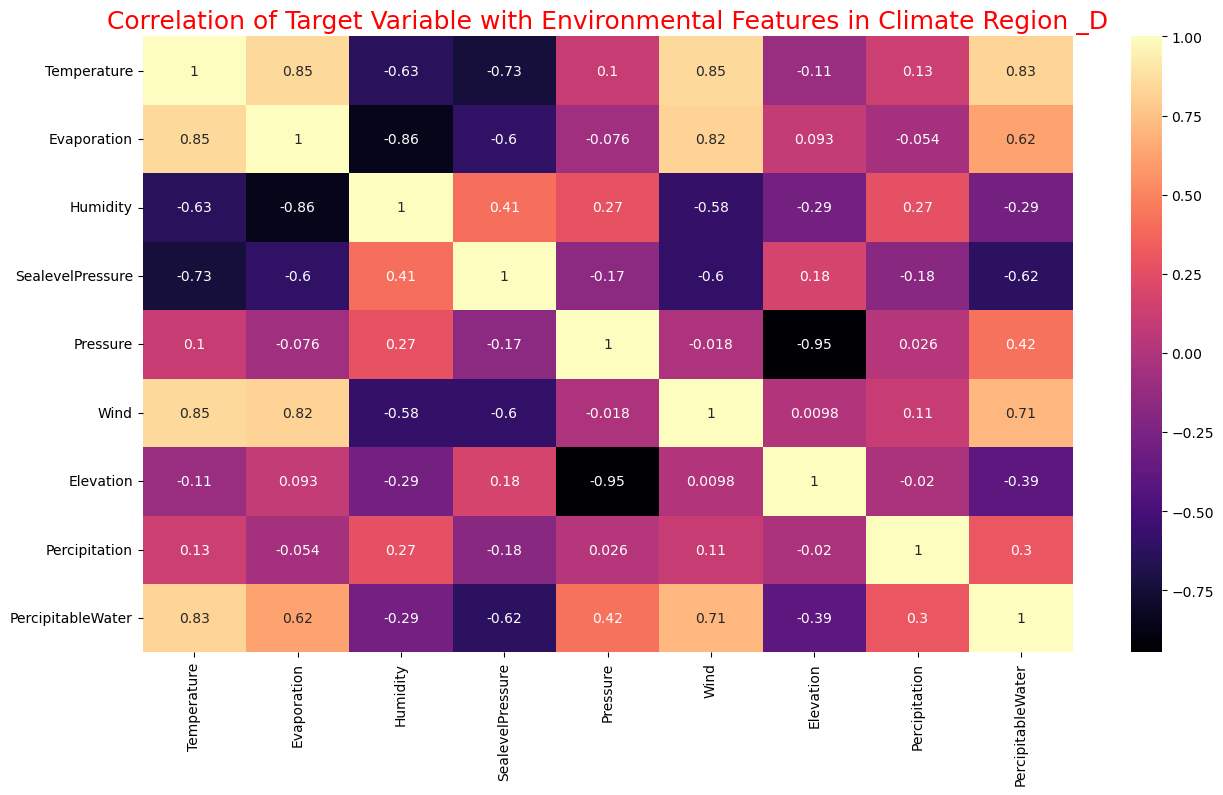

In [45]:
def Plotting4():          # Plotting the Heatmap...
    plt.figure(figsize=(15,8))
    sns.heatmap(data4.corr(),cmap="magma", annot=True)
    plt.title("Correlation of Target Variable with Environmental Features in Climate Region _D", size=18, c="RED")
    plt.show()

Plotting4()

Observations:
1. Highly correlated features:  
                                Temperature & Evaporation (0.85)
                                Temperature & Wind (0.85)
                                Evaporation & Wind (0.82)
                                Temperature & Percipitable water(0.83)
2. Negatively correlated features : 
                                    Temperature & Sealevel pressure (-0.73)
                                    Percipitablewater & Sealevel pressure(-0.62)
                                    Elevation & Pressure(-0.95)
                                    Humidity & Evaporation(-0.85)
                                    Humidity & Temperature(-0.63)
                                    Humidity & Wind (-0.58)

Final Conclusions after splitting of dataset based on climatic regions 'B', 'C' & 'D' -
1. Temperature have high correlation with Wind & Percipitable water and negatively correlated with Humidity.
2. Elevation and Pressure are negatively correlated and  they have the same affect on Temperature , so we can drop any one of them.
3. Since Evaporation have high corelation with Temperature and have low correlation with humidity and wind, we could eliminate evaporation.